In [13]:
import random
import operator
import time
import matplotlib.pyplot as plt

In [14]:
#Choosing a fitness function

def fitness(password, test_word) : 
    
    if (len(test_word) != len(password)) : 
        print("taille incompatible")
        return
    else : 
        score = 0
        i = 0
        while ( i < len(password)) : 
            if(password[i] == test_word[i]) :
                score += 1
            i+=1
            
        return score * 100 / len(password)

In [15]:
# Creating our first population

def generateAWord (length) : 
    i = 0
    result = ""
    while i < length : 
        letter = chr(97 + int(26 * random.random()))
        result += letter
        i += 1
        
    return result

def generateFirstPopulation(sizePopulation, password) : 
    population = []
    i = 0
    while i < sizePopulation : 
        population.append(generateAWord(len(password)))
        i+=1
    return population



# Computing scores of population : 

def computePerfPopulation(population, password) : 
    populationPerf = {}
    score = 0
    for individual in population :
        populationPerf[individual] = fitness(password, individual)
        score += populationPerf[individual]
    
    return sorted(populationPerf.items(), key = operator.itemgetter(1), reverse = True)


# Selecting Next generation : 

def selectFromPopulation(populationSorted, best_sample, lucky_few) : 
    nextGeneration = []
    for i in range(best_sample) : 
        nextGeneration.append(populationSorted[i][0])

    for i in range(lucky_few) : 
        nextGeneration.append(random.choice(populationSorted)[0])
    random.shuffle(nextGeneration)
    return nextGeneration

In [16]:
# Breeding

def createChild(individual1, individual2) : 
    child = ""
    for i in range(len(individual1)) : 
        if(int(100 * random.random()) < 50) : 
            child += individual1[i]
        else : 
            child += individual2[i]
            
    return child


def createChildren(breeders, number_of_child) : 
    
    nextPopulation = []
    
    for i in range( int(len(breeders)/2)) : 
        for j in range(number_of_child) : 
            nextPopulation.append(createChild(breeders[i], breeders[len(breeders) - 1 - i]))
    
    return nextPopulation

In [17]:
# Mutation

def mutateWord(word) : 
    index_modification = int(random.random() * len(word))
    
    if(index_modification == 0) : 
        word = chr(97 + int(26 * random.random())) + word[1:]
    else : 
        word = word[:index_modification] + chr(97 + int(26 * random.random())) + word[index_modification+1:]
    return word

def mutatePopulation(population, chance_of_mutation) : 
    for i in range(len(population)) : 
        if random.random() * 100 < chance_of_mutation : 
            population[i] = mutateWord(population[i])
    return population
    

In [18]:
# Generating Next Generation

def nextGeneration(firstGeneration, password, best_sample, lucky_few, number_of_child, chance_of_mutation) :
    populationSorted = computePerfPopulation(firstGeneration, password)
    print(populationSorted[1])
    nextBreeders = selectFromPopulation(populationSorted, best_sample, lucky_few)
    nextPopulation = createChildren(nextBreeders, number_of_child)
    nextGeneration = mutatePopulation(nextPopulation, chance_of_mutation)
    return nextGeneration

def multipleGeneration(number_of_generation, password, size_population, best_sample, lucky_few, number_of_child, chance_of_mutation) : 
    historic = []
    historic.append(generateFirstPopulation(size_population, password))
    for i in range (number_of_generation) : 
        historic.append(nextGeneration(historic[i], password, best_sample, lucky_few, number_of_child, chance_of_mutation))
    return historic

In [19]:
# analysis Tools

def getBestIndividualFromPopulation ( population, password) : 
    return computePerfPopulation(population, password)[0]

def getListBestIndividualFromHistorique (historic, password) : 
    bestIndividuals = []
    for population in historic : 
        bestIndividuals.append(getBestIndividualFromPopulation(population, password))
    return bestIndividuals



In [20]:
# print Result

def printSimpleResult(historic, password, number_of_generation) : 
    result = getListBestIndividualFromHistorique(historic, password)[number_of_generation-1]
    print("solution: \"" + result[0] + "\" de fitness: " + str(result[1]))

In [21]:
# Graph

def evolutionBestFitness(historic, password) : 
    plt.axis([0, len(historic), 0, 105])
    plt.title(password)
    
    evolutionFitness = []
    for population in historic : 
        evolutionFitness.append(getBestIndividualFromPopulation(population, password)[1])
        
    plt.plot(evolutionFitness)
    plt.ylabel('fitness best individual')
    plt.xlabel('generation')
    plt.show()
    
    
def evolutionAverageFitness(historic, password, size_population):
    plt.axis([0,len(historic), 0, 105])
    plt.title(password)
    
    evolutionFitness = []
    
    for population in historic : 
        populationPerf = computePerfPopulation(population, password)
        averageFitness = 0
        for individual in populationPerf : 
            averageFitness += individual[1]
        evolutionFitness.append(averageFitness/size_population) 
    plt.plot(evolutionFitness)
    plt.ylabel('Average fitness')
    plt.xlabel('generation')
    plt.show()
    
    

('jrllofc', 14.285714285714286)
('skigydj', 28.571428571428573)
('yktgvnj', 28.571428571428573)
('dkygiyw', 42.857142857142854)
('skyciew', 57.142857142857146)
('skyginq', 71.42857142857143)
('skynino', 71.42857142857143)
('skyrine', 85.71428571428571)
('shyline', 85.71428571428571)
('skynine', 85.71428571428571)
('skyliee', 85.71428571428571)
('skynine', 85.71428571428571)
('rkyline', 85.71428571428571)
('sayline', 85.71428571428571)
('spyline', 85.71428571428571)
('szyline', 85.71428571428571)
('skwline', 85.71428571428571)
('skynine', 85.71428571428571)
('skytine', 85.71428571428571)
('skytine', 85.71428571428571)
('sxyline', 85.71428571428571)
('skyoine', 85.71428571428571)
('skytine', 85.71428571428571)
('skyrine', 85.71428571428571)
('skwline', 85.71428571428571)
('spyline', 85.71428571428571)
('skybine', 85.71428571428571)
('skrline', 85.71428571428571)
('skyrine', 85.71428571428571)
('skyaine', 85.71428571428571)
('skyrine', 85.71428571428571)
('sayline', 85.71428571428571)
('s

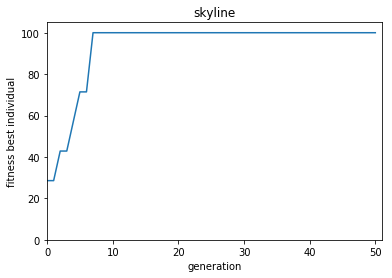

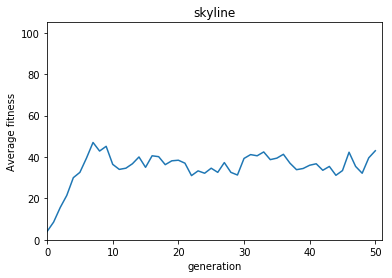

In [24]:
# Main

password = "skyline"
size_population = 100
best_sample = 20
lucky_few = 20
number_of_child = 5
number_of_generation = 50
chance_of_mutation = 5


if((best_sample + lucky_few) / 2 * number_of_child != size_population) : 
    print ("population size not stable")

else : 
    historic = multipleGeneration(number_of_generation, password, size_population, best_sample, lucky_few, number_of_child, chance_of_mutation)
    printSimpleResult(historic, password, number_of_generation)
    
    evolutionBestFitness(historic, password)
    evolutionAverageFitness(historic, password, size_population)
    

    